# 📌 Assignment: Model Optimization and Performance Tuning

# 🚀 Solve It Yourself!

This assignment is your chance to think like a data scientist. Don’t rely on AI to do the work for you — the real learning happens when you explore, experiment, and problem-solve.

Mistakes are okay — they’re part of the journey. Trust your skills, stay curious, and give it your best shot.

You’ve got this! 💪

## 🎯 Objective:

- Explore Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree (with CCP Post-Pruning), and Random Forest.
- Optimize and compare model performance.

## 📌 Hint:

- Make a result dataframe to append to it model name and performance metrics for final comparison (use visualization as well).
---

## 📝 Part 1: Data Preparation
1. **Download a dataset from Kagglehub**.
2. **Load the dataset** and inspect its structure (columns, types, missing values).
3. **Preprocess the data:**
   - Handle missing values
   - Encode categorical variables
   - Scale numeric features

👉 **Question:** What preprocessing steps did you apply, and why?

In [ ]:
import kagglehub
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
import os
import pandas as pd
import shap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

100%|██████████| 652k/652k [00:00<00:00, 1.06MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/wenruliu/adult-income-dataset/versions/2


In [ ]:
data_name = os.listdir(path)[0]

full_path = os.path.join(path,data_name)

df = pd.read_csv(full_path)


In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df.replace('?', pd.NA, inplace=True)


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df["workclass"].df["workclass"].fillna("Unknown")
df["occupation"] = df["occupation"].fillna("Unknown")
df["native-country"] = df["native-country"].fillna("Unknown")


In [ ]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).columns
unique_values = {col: df[col].dropna().unique().tolist() for col in categorical_cols}

for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values ({len(values)}): {values}\n")


Column: workclass
Unique Values (9): ['Private', 'Local-gov', 'Unknown', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']

Column: education
Unique Values (16): ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', 'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate', '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']

Column: marital-status
Unique Values (7): ['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse']

Column: occupation
Unique Values (15): ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Unknown', 'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']

Column: relationship
Unique Values (6): ['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife', 'Other-relative']

Column: race
Unique Val

In [ ]:
# Define mapping dictionaries

workclass_mapping = {
    'Private': 1, 'Self-emp-not-inc': 2, 'Local-gov': 3, 'State-gov': 4,
    'Self-emp-inc': 5, 'Federal-gov': 6, 'Without-pay': 7, 'Never-worked': 8, 'Unknown': -1
}

education_mapping = {
    'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5, '10th': 6,
    '11th': 7, '12th': 8, 'HS-grad': 9, 'Some-college': 10, 'Assoc-acdm': 11, 'Assoc-voc': 12,
    'Bachelors': 13, 'Masters': 14, 'Prof-school': 15, 'Doctorate': 16
}

marital_status_mapping = {
    'Never-married': 1, 'Married-civ-spouse': 2, 'Married-AF-spouse': 3, 'Married-spouse-absent': 4,
    'Divorced': 5, 'Separated': 6, 'Widowed': 7
}

occupation_mapping = {
    'Armed-Forces': 1, 'Exec-managerial': 2, 'Prof-specialty': 3, 'Tech-support': 4,
    'Protective-serv': 5, 'Sales': 6, 'Craft-repair': 7, 'Transport-moving': 8,
    'Adm-clerical': 9, 'Machine-op-inspct': 10, 'Farming-fishing': 11, 'Handlers-cleaners': 12,
    'Other-service': 13, 'Priv-house-serv': 14, 'Unknown': -1
}

relationship_mapping = {
    'Husband': 1, 'Wife': 2, 'Own-child': 3, 'Other-relative': 4, 'Not-in-family': 5, 'Unmarried': 6
}

race_mapping = {
    'White': 1, 'Black': 2, 'Asian-Pac-Islander': 3, 'Amer-Indian-Eskimo': 4, 'Other': 5
}

gender_mapping = {
    'Male': 1, 'Female': 2
}

native_country_mapping = {
    'United-States': 1, 'Mexico': 2, 'Canada': 3, 'Germany': 4, 'Philippines': 5, 'India': 6,
    'China': 7, 'Japan': 8, 'England': 9, 'Cuba': 10, 'Jamaica': 11, 'Iran': 12, 'Italy': 13,
    'Vietnam': 14, 'South': 15, 'Puerto-Rico': 16, 'Poland': 17, 'Columbia': 18, 'Haiti': 19,
    'Dominican-Republic': 20, 'Ecuador': 21, 'Guatemala': 22, 'El-Salvador': 23, 'Portugal': 24,
    'Peru': 25, 'Nicaragua': 26, 'France': 27, 'Laos': 28, 'Thailand': 29, 'Cambodia': 30,
    'Hong': 31, 'Scotland': 32, 'Greece': 33, 'Yugoslavia': 34, 'Hungary': 35, 'Honduras': 36,
    'Trinadad&Tobago': 37, 'Taiwan': 38, 'Outlying-US(Guam-USVI-etc)': 39, 'Holand-Netherlands': 40,
    'Unknown': -1
}

income_mapping = {
    '<=50K': 0, '>50K': 1
}

# Apply mappings to DataFrame
df["workclass"] = df["workclass"].map(workclass_mapping)
df["education"] = df["education"].map(education_mapping)
df["marital-status"] = df["marital-status"].map(marital_status_mapping)
df["occupation"] = df["occupation"].map(occupation_mapping)
df["relationship"] = df["relationship"].map(relationship_mapping)
df["race"] = df["race"].map(race_mapping)
df["gender"] = df["gender"].map(gender_mapping)
df["native-country"] = df["native-country"].map(native_country_mapping)
df["income"] = df["income"].map(income_mapping)


df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,1,226802,7,7,1,10,3,2,1,0,0,40,1.0,0
1,38,1,89814,9,9,2,11,1,1,1,0,0,50,1.0,0
2,28,3,336951,11,12,2,5,1,1,1,0,0,40,1.0,1
3,44,1,160323,10,10,2,10,1,2,1,7688,0,40,1.0,1
4,18,-1,103497,10,10,1,-1,3,1,2,0,0,30,1.0,0


In [ ]:
df.drop("fnlwgt", axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
columns_to_standardize = ["capital-gain", "capital-loss"]
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,1,226802,7,7,1,10,3,2,1,-0.144804,-0.217127,40,1.0,0
1,38,1,89814,9,9,2,11,1,1,1,-0.144804,-0.217127,50,1.0,0
2,28,3,336951,11,12,2,5,1,1,1,-0.144804,-0.217127,40,1.0,1
3,44,1,160323,10,10,2,10,1,2,1,0.886874,-0.217127,40,1.0,1
4,18,-1,103497,10,10,1,-1,3,1,2,-0.144804,-0.217127,30,1.0,0


## 🔍 Part 2: Model Building

### 🔹 2.1 Logistic Regression
- Build a baseline Logistic Regression model.
- **Experiment:** Tune the `C` parameter (regularization strength).

👉 **Question:** How does changing `C` affect the model’s performance?

In [ ]:
X=df.drop('income',axis=1)
y=df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
results = []
for C_val in C_values:
    model = LogisticRegression(C=C_val, solver='liblinear', random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results.append({"C": C_val, "Accuracy": acc})


df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print(df_results)

         C  Accuracy
3    1.000  0.843561
4   10.000  0.843459
5  100.000  0.843356
2    0.100  0.842639
1    0.010  0.837619
0    0.001  0.826042


In [ ]:
df_log_results = pd.DataFrame(df_results).sort_values(by="Accuracy", ascending=False)
print(df_log_results)

best_C = df_log_results.iloc[0]["C"]
log_best = LogisticRegression(C=best_C, solver='liblinear', random_state=42)
log_best.fit(X_train, y_train)

         C  Accuracy
3    1.000  0.843561
4   10.000  0.843459
5  100.000  0.843356
2    0.100  0.842639
1    0.010  0.837619
0    0.001  0.826042


LogisticRegression(C=np.float64(1.0), random_state=42, solver='liblinear')

### 🔹 2.2 K-Nearest Neighbors (KNN)
- Train a KNN model with a default `k=5`.
- **Experiment:**
   - Test different values of `k`.
   - Compare performance using `euclidean` vs. `manhattan` distance.

👉 **Question:** What is the best `k` for your dataset? Why did it perform better?

In [ ]:
k_values = range(1, 21)
metrics = ['euclidean', 'manhattan']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {metric: [] for metric in metrics}

for metric in metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')
        results[metric].append(scores.mean())  # Store mean accuracy

euclidean_scores = np.array(results['euclidean'])
manhattan_scores = np.array(results['manhattan'])


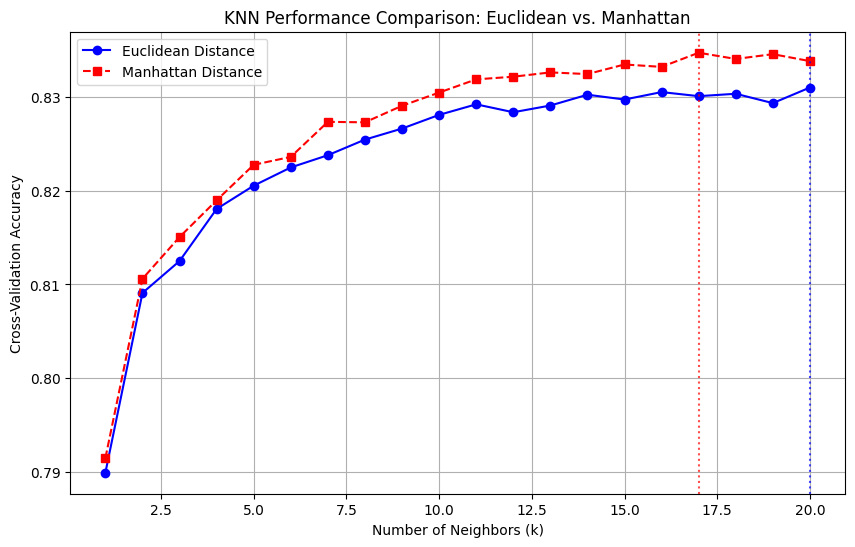

Best k for Euclidean: 20, Accuracy: 0.8310
Best k for Manhattan: 17, Accuracy: 0.8347


In [ ]:
plt.figure(figsize=(10, 6))


plt.plot(k_values, euclidean_scores, marker='o', linestyle='-', label='Euclidean Distance', color='b')
plt.plot(k_values, manhattan_scores, marker='s', linestyle='--', label='Manhattan Distance', color='r')


best_k_euclidean = k_values[np.argmax(euclidean_scores)]
best_k_manhattan = k_values[np.argmax(manhattan_scores)]

plt.axvline(x=best_k_euclidean, color='b', linestyle='dotted', alpha=0.7)
plt.axvline(x=best_k_manhattan, color='r', linestyle='dotted', alpha=0.7)


plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("KNN Performance Comparison: Euclidean vs. Manhattan")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best k for Euclidean: {best_k_euclidean}, Accuracy: {max(euclidean_scores):.4f}")
print(f"Best k for Manhattan: {best_k_manhattan}, Accuracy: {max(manhattan_scores):.4f}")


In [ ]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "metric": ["euclidean", "manhattan"]
}


knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_

print("Best KNN Parameters:", knn_grid.best_params_)


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 9}


## 🌳 Part 3: Decision Tree with Pre-pruning & CCP (Post Pruning)
- Train a Decision Tree with default settings.
- Try pre-pruning hyperparameters.
- Check feature importance attribute.
- Extract `ccp_alpha` values using `cost_complexity_pruning_path`.
- Build pruned trees for different `ccp_alpha` values.

👉 **Question:** What pre-pruning hyperparameter did you tune? How did you change them to increase performance?

👉 **Question:** Which `ccp_alpha` value gave the best results, and why?

👉 **Question:** How did the tree size change after pruning?

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
default_acc = accuracy_score(y_test, y_pred)
print(f"Default Decision Tree Accuracy: {default_acc:.4f}")


Default Decision Tree Accuracy: 0.8169


In [ ]:
prepruned_dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

prepruned_dt.fit(X_train, y_train)
y_pred_prepruned = prepruned_dt.predict(X_test)
prepruned_acc = accuracy_score(y_test, y_pred_prepruned)

print(f"Pre-Pruned Tree Accuracy: {prepruned_acc:.4f}")


Pre-Pruned Tree Accuracy: 0.8565


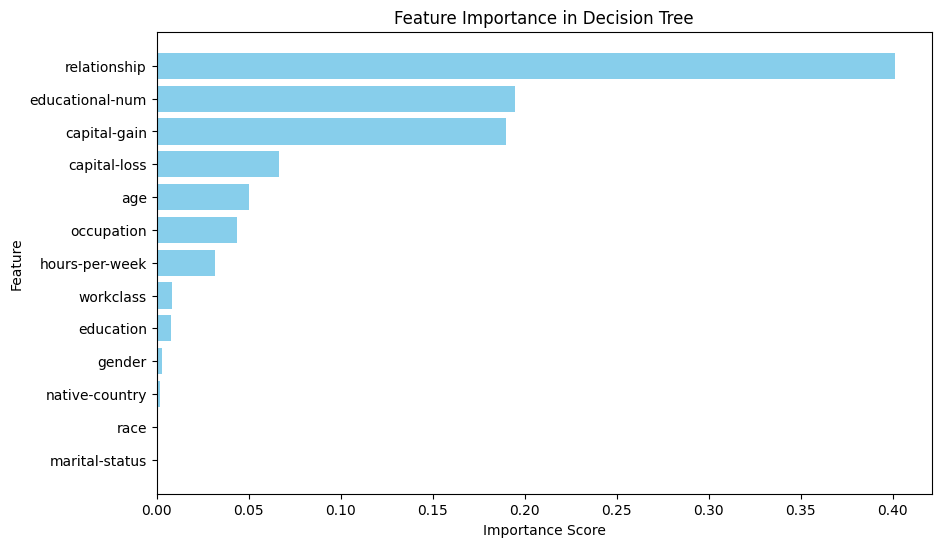

In [ ]:
importances = prepruned_dt.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()
plt.show()


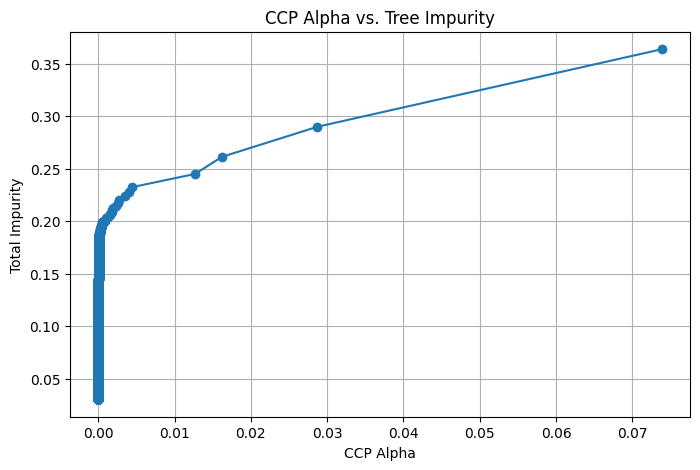

In [ ]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, impurities, marker='o', linestyle='-')
plt.xlabel("CCP Alpha")
plt.ylabel("Total Impurity")
plt.title("CCP Alpha vs. Tree Impurity")
plt.grid(True)
plt.show()


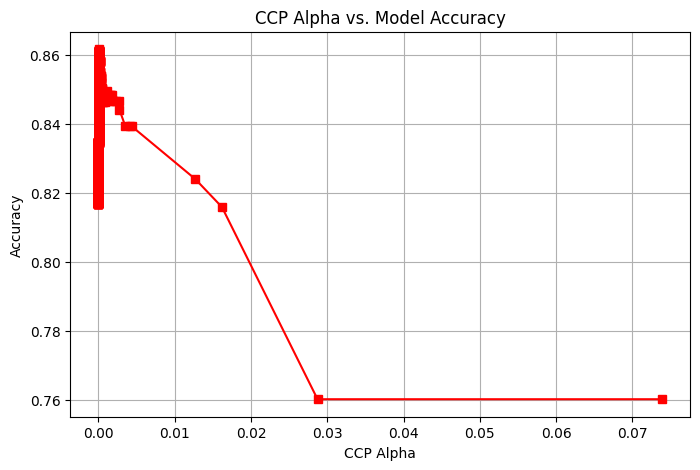

Best ccp_alpha: 0.0001, Accuracy: 0.8616


In [ ]:
ccp_results = {}

for ccp_alpha in ccp_alphas:
    pruned_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    pruned_dt.fit(X_train, y_train)
    y_pred_pruned = pruned_dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred_pruned)
    ccp_results[ccp_alpha] = acc


ccp_alphas = list(ccp_results.keys())
accuracies = list(ccp_results.values())


plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, accuracies, marker='s', linestyle='-', color='r')
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("CCP Alpha vs. Model Accuracy")
plt.grid(True)
plt.show()

best_ccp_alpha = ccp_alphas[np.argmax(accuracies)]
print(f"Best ccp_alpha: {best_ccp_alpha:.4f}, Accuracy: {max(accuracies):.4f}")


In [ ]:
param_grid = {
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_

print("Best Decision Tree Parameters:", dt_grid.best_params_)


## 🌲 Part 4: Random Forest
- Train a Random Forest model with 100 trees.
- **Experiment:** Vary `n_estimators` and `max_depth` and other hyperparameters.

👉 **Question:** How did changing these hyperparameters affect performance?

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
default_acc = accuracy_score(y_test, y_pred_rf)

print(f"Default Random Forest Accuracy: {default_acc:.4f}")


Default Random Forest Accuracy: 0.8488


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)


best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
best_acc = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Accuracy: {best_acc:.4f}")


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest Accuracy: 0.8653


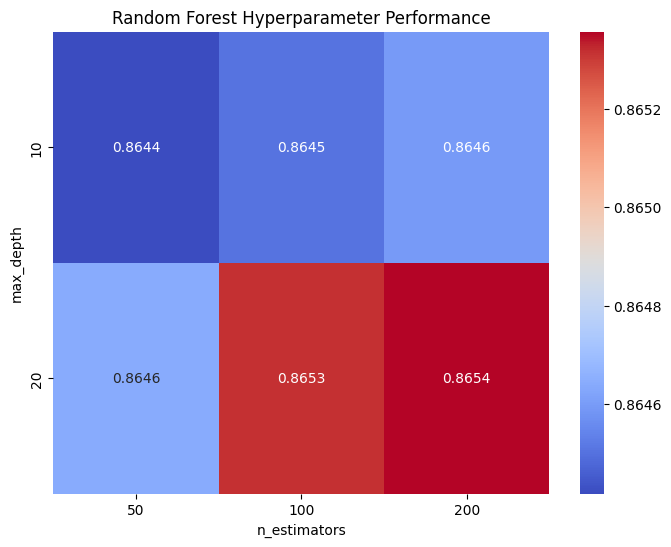

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
heatmap_data = results.groupby(["param_max_depth", "param_n_estimators"])["mean_test_score"].mean().unstack()


plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".4f")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.title("Random Forest Hyperparameter Performance")
plt.show()


100%|===================| 19513/19522 [21:06<00:00]       

<Figure size 640x480 with 0 Axes>

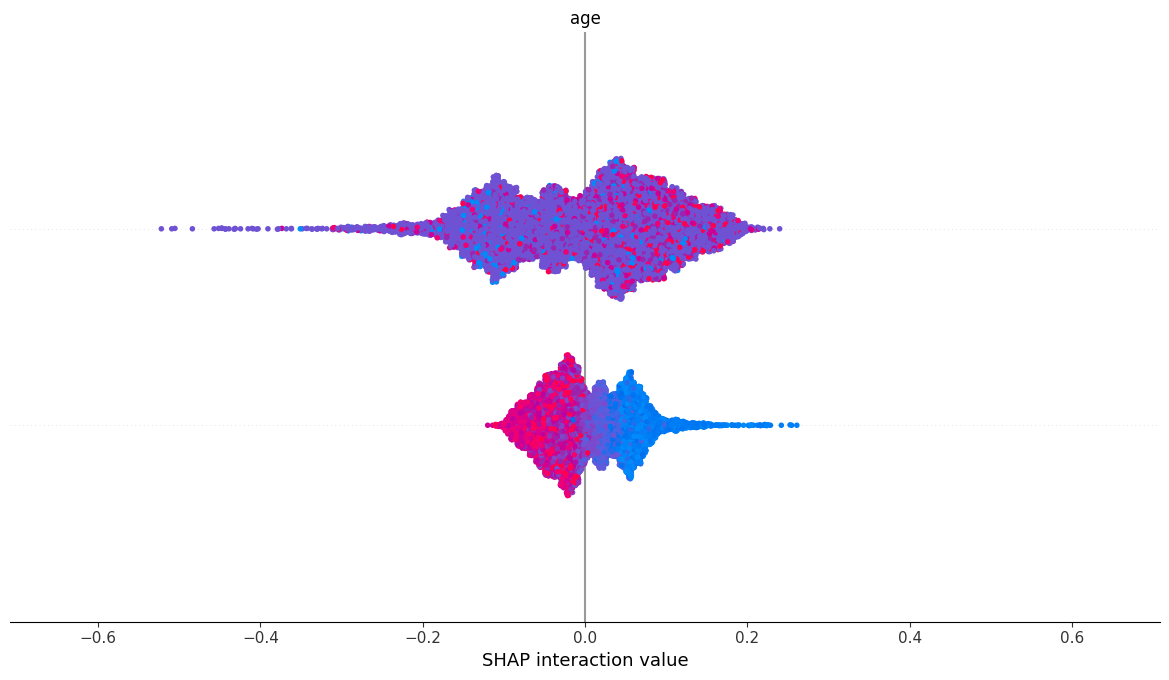

In [ ]:
explainer = shap.Explainer(best_rf, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


## 🧠 Part 5: Model Comparison and Optimization
- Compare all models using Accuracy, Precision, Recall, and F1-score.
- **Reflect:**
   - Which model performed best?
   - How did tuning improve performance?
   - What trade-offs (e.g., overfitting vs. underfitting) did you observe?

👉 **Question:** Summarize which model you would choose for this dataset and why.

In [52]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

models = {
    "K-Nearest Neighbors": knn_best,
    "Decision Tree (Pruned)": dt_best,
    "Random Forest (Tuned)": best_rf,
    "Logistic Regression (Best C)": log_best
}


results = {name: evaluate_model(model, X_test, y_test) for name, model in models.items()}
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="F1-Score", ascending=False)

print("📊 Model Evaluation Summary:")
print(results_df)


📊 Model Evaluation Summary:
                              Accuracy  Precision    Recall  F1-Score
Random Forest (Tuned)         0.865280   0.775686  0.616239  0.686830
Decision Tree (Pruned)        0.856777   0.729980  0.638889  0.681404
Logistic Regression (Best C)  0.843561   0.729531  0.552137  0.628558
K-Nearest Neighbors           0.829423   0.676609  0.552564  0.608327


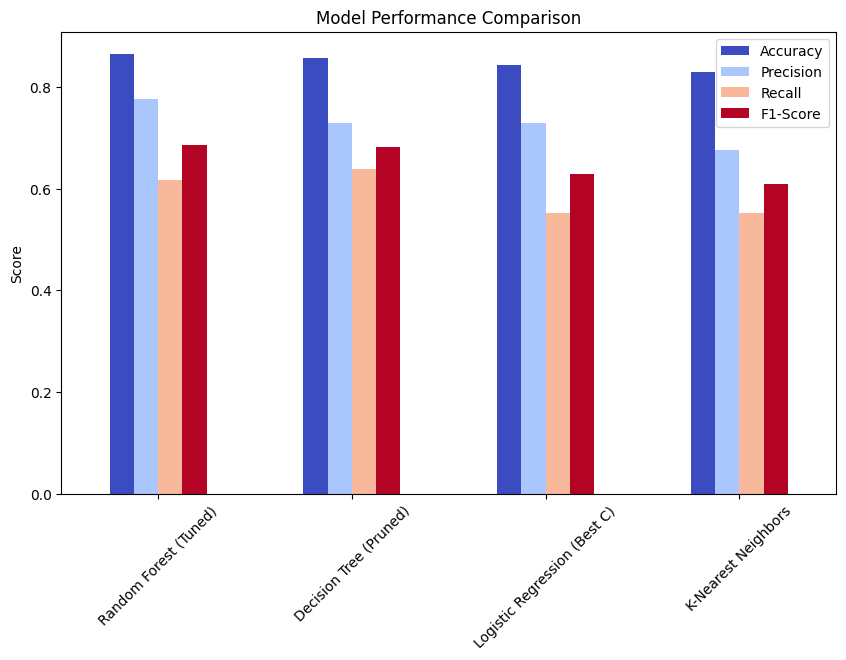

In [53]:
results_df.plot(kind="bar", figsize=(10, 6), colormap="coolwarm")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


## ⭐ Stretch Goal (Optional):
- Use **GridSearchCV** or **RandomizedSearchCV** to fully optimize one model and retrieve best parameters and best model for each.
- Visualize **feature importance** (especially for Decision Tree/Random Forest).

👉 **Bonus Question:** Did advanced tuning or feature importance insights change your final model choice?

In [54]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)


Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


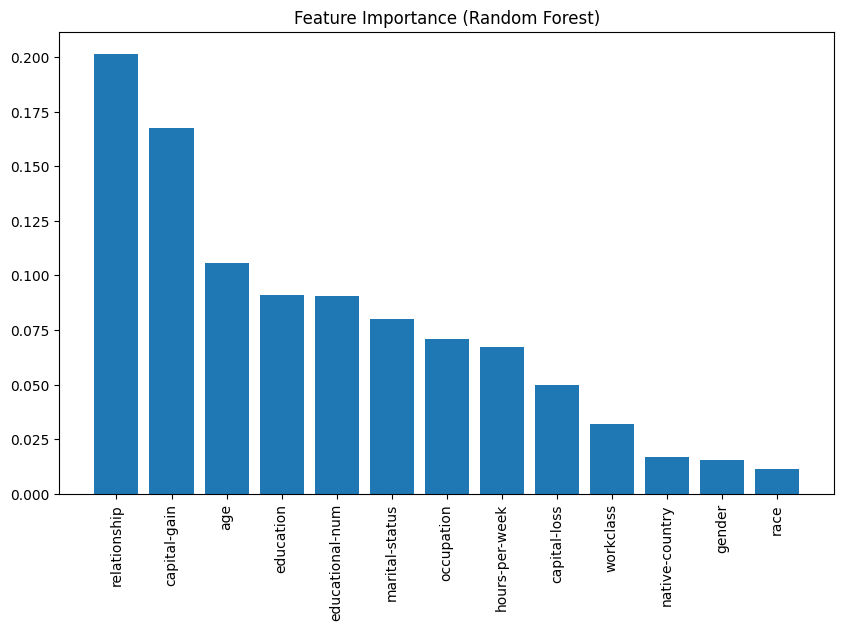

In [55]:
rf_importance = best_rf.feature_importances_
features = X_train.columns


indices = np.argsort(rf_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train.shape[1]), rf_importance[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.show()


In [56]:
rf_optimized_results = evaluate_model(best_rf, X_test, y_test)

results["Random Forest (Optimized)"] = rf_optimized_results
results_df = pd.DataFrame(results).T
print(results_df)


                              Accuracy  Precision    Recall  F1-Score
K-Nearest Neighbors           0.829423   0.676609  0.552564  0.608327
Decision Tree (Pruned)        0.856777   0.729980  0.638889  0.681404
Random Forest (Tuned)         0.865280   0.775686  0.616239  0.686830
Logistic Regression (Best C)  0.843561   0.729531  0.552137  0.628558
Random Forest (Optimized)     0.865280   0.775686  0.616239  0.686830
